<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Actividad Individual: Trabajando con redes neuronales y Deep Learning</header1></left>

<left><h2>Apartado 1 - Regresión</header2></left>

Presentado por: Sergio Andrés Bedoya Angulo  <br>
Fecha: 15/01/2024

## Importación de librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Código para cargar el Dataset
df = pd.read_csv('https://raw.githubusercontent.com/sergiobedoya/UNIR-TIA_ACT2/main/autos.csv')
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [4]:
df.isnull().sum().sort_values(ascending=False)

notRepairedDamage      72060
vehicleType            37869
fuelType               33386
model                  20484
gearbox                20209
index                      0
kilometer                  0
postalCode                 0
nrOfPictures               0
dateCreated                0
brand                      0
monthOfRegistration        0
powerPS                    0
dateCrawled                0
yearOfRegistration         0
abtest                     0
price                      0
offerType                  0
seller                     0
name                       0
lastSeen                   0
dtype: int64

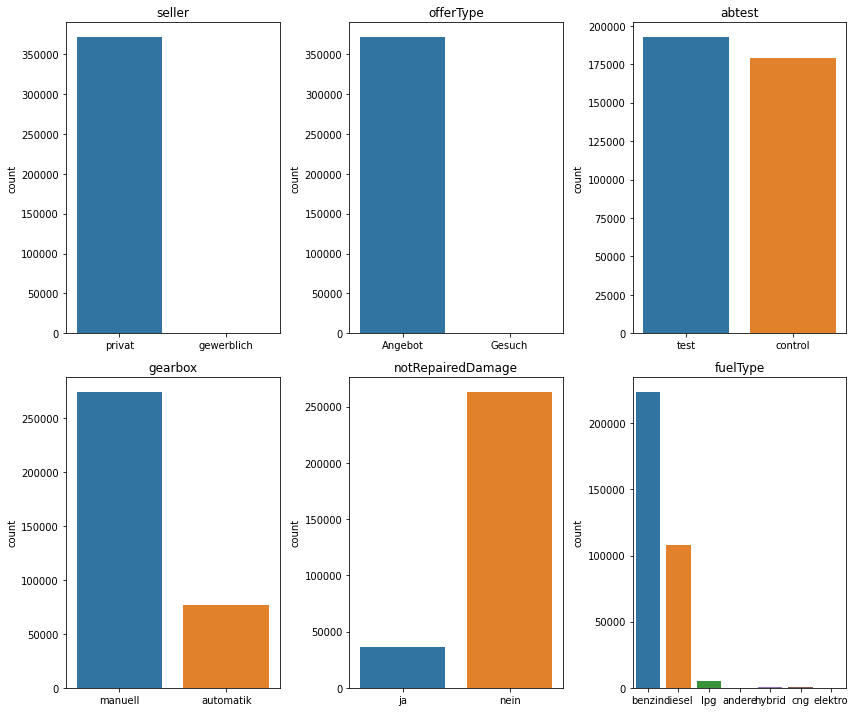

In [5]:
# Revisemos algunas variables categóricas que hacen parte del dataset
campos = ["seller","offerType","abtest","gearbox","notRepairedDamage","fuelType"]
plt.figure(figsize=(12, 10))
for i, campo in enumerate(campos, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=campo, data=df)
    plt.xlabel("")
    plt.title(f'{campo}')

plt.tight_layout()
plt.show()


In [6]:
# Revisemos variables categóricas que puedan tener muchos valores
campos = ["model","vehicleType","brand"]

for campo in campos:
    print(f"{campo} tiene {df[campo].nunique()} valores diferentes")

model tiene 251 valores diferentes
vehicleType tiene 8 valores diferentes
brand tiene 40 valores diferentes


count    371528.000000
mean     125618.688228
std       40112.337051
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64


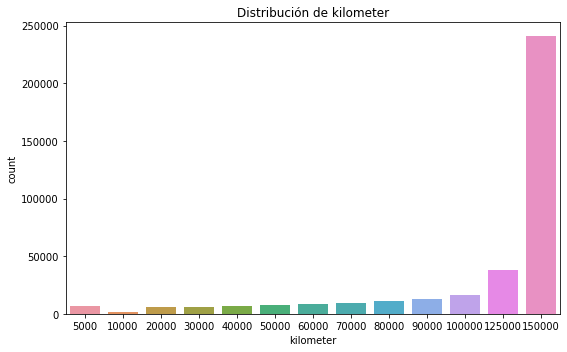

count    371528.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: nrOfPictures, dtype: float64


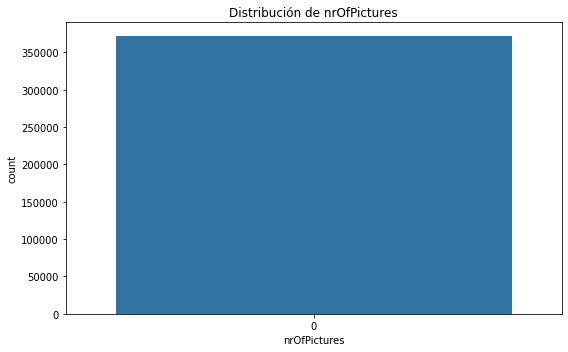

count    371528.000000
mean        115.549477
std         192.139578
min           0.000000
25%          70.000000
50%         105.000000
75%         150.000000
max       20000.000000
Name: powerPS, dtype: float64


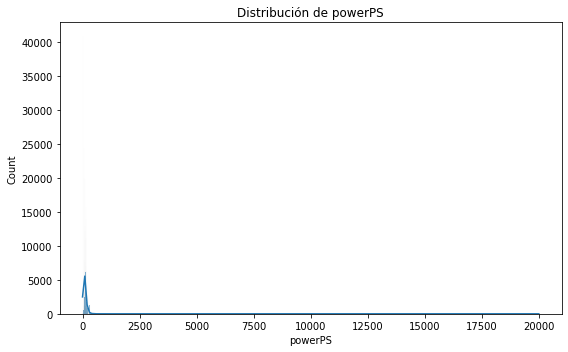

In [7]:
#Ahora revisemos la distribución variables cuantitativas que puedan ser de interés.

campos = ["kilometer", "nrOfPictures","powerPS"]

for campo in campos:
    print(df[campo].describe())

    plt.figure(figsize=(8, 5))
    if campo == "powerPS":
        sns.histplot(df[campo], kde=True)
    else:
        sns.countplot(x=campo, data=df)
    plt.title(f'Distribución de {campo}')
    plt.tight_layout()
    plt.show()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64


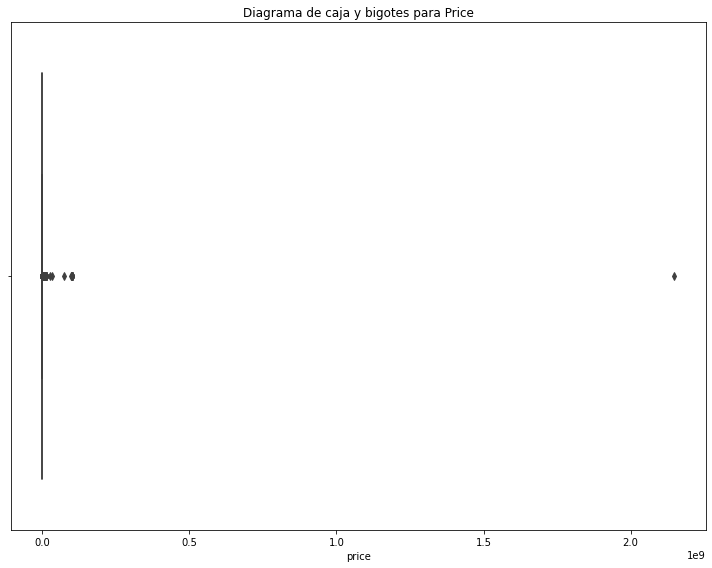

In [9]:
# Ahora procederemos a revisar la distribución de la variable a predecir, price
print(df["price"].describe())

plt.figure(figsize=(10, 8))
sns.boxplot(x="price", data=df)
plt.title(f'Diagrama de caja y bigotes para Price')
plt.tight_layout()
plt.show()

In [ ]:
# Es el momento de escoger los campos que consideramos pueden ayudarnos a predecir el precio de los carros
df_mod = df[["abtest","vehicleType","gearbox","powerPS","model","kilometer","fuelType","brand","notRepairedDamage","price"]]

# Eliminamos registros con valores nulos
df_mod.dropna(inplace=True)

# Busquemos un rango de valores para el campo powerPS donde no haya valores atípicos

# Busquemos un rango de valores para el campo price donde no haya valores atípicos

# Con ayuda de enconders, comencemos a brindar nuestro dataset con la estructura necesaria para los procesos de aprendizaje.